In [1]:
import glob
import pandas as pd
import numpy as np
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
from matplotlib.colors import LinearSegmentedColormap as lsc
%matplotlib inline

# Watermark is not required for this code, but is included for information. 
import watermark
%load_ext watermark
%watermark -a "ELEANOR LUTZ" -d -v -iv -m

pandas                          0.23.4
matplotlib                      3.0.3
numpy                           1.15.4
watermark                       1.8.1
cartopy                         0.17.0
matplotlib.backends.backend_pdf 3.0.3
ELEANOR LUTZ 2019-07-07 

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores  : 12
interpreter: 64bit


In [2]:
# Define variables used across all maps (size, color, projection center points)

figsize = (19.53/2, 18.55/2)
figsize_small = (9.235*(835/5536), 9.235*(835/5536))

ortho = [330, 30]
ortho_opp = [150, 0]
ortho_small = [60, 30]
ortho_n = [330, 90]
ortho_s = [330, -90]

cloud_colors = ['#1a1538', '#315454', '#e7dac1']
solar_colors = ['#ffffff', '#e7dac1', '#7c1516', '#381515']
cloud_cmap = lsc.from_list("cloud_cmap", cloud_colors)
solar_cmap = lsc.from_list("solar_cmap", solar_colors)
img_extent = (-180, 180, -90, 90)

In [3]:
# Define function to save images in a standardized way 

def set_save_image(fig, savename, dpi=600, show=False):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        try:
            ax.set_global()
            ax.background_patch.set_fill(False)
        except:
            pass

    # Remove all padding and margins
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    if show == True: 
        plt.show()
    plt.clf()
    plt.close('all')

Finished with file for: april
Finished with file for: august
Finished with file for: december
Finished with file for: february


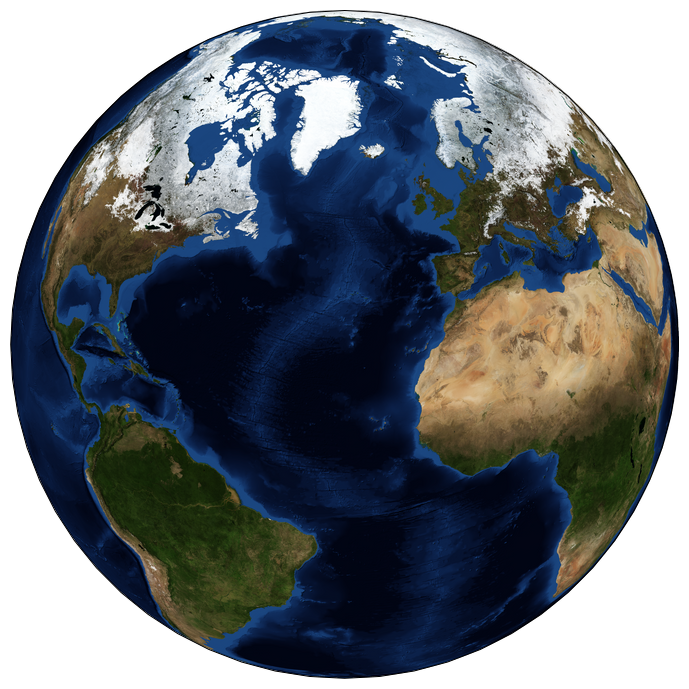

Finished with file for: january
Finished with file for: july
Finished with file for: june
Finished with file for: march
Finished with file for: may
Finished with file for: november
Finished with file for: october
Finished with file for: september


In [6]:
# PLOT RASTER IMAGES FOR LARGE EARTH IMAGE AT CENTER

filenames = glob.glob("A:/ATLAS_OF_SPACE/raw_data/earth/blue_marble_NASA/*.png")

for readname in filenames: 
    month = readname.split("/")[-1].split("\\")[-1].split("_")[0]
    savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/blue_marble_NASA/'+month+'_earth.png'

    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.Orthographic(*ortho))
    img = plt.imread(readname)
    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
              interpolation='spline36', regrid_shape=4000)
    
    if month == 'january':
        show = True
    else: 
        show = False
    set_save_image(fig, savename, show=show)
    print("Finished with file for:", month)

Finished with files for: N april
Finished with files for: S april
Finished with files for: N august
Finished with files for: S august
Finished with files for: N december
Finished with files for: S december
Finished with files for: N february
Finished with files for: S february


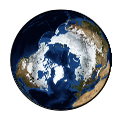

Finished with files for: N january


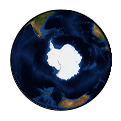

Finished with files for: S january
Finished with files for: N july
Finished with files for: S july
Finished with files for: N june
Finished with files for: S june
Finished with files for: N march
Finished with files for: S march
Finished with files for: N may
Finished with files for: S may
Finished with files for: N november
Finished with files for: S november
Finished with files for: N october
Finished with files for: S october
Finished with files for: N september
Finished with files for: S september


In [14]:
# PLOT RASTER IMAGES FOR SMALL EARTH IMAGES ON UPPER LEFT & RIGHT

filenames = glob.glob("A:/ATLAS_OF_SPACE/raw_data/earth/blue_marble_NASA/*.png")
orthos = ortho_n, ortho_s
labels = "N", "S"

for readname in filenames: 
    for orth, label in zip(orthos, labels):
        month = readname.split("/")[-1].split("\\")[-1].split("_")[0]
        savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/blue_marble_NASA_'+label+'/'+label+"_"+month+'_earth.png'

        fig = plt.figure(figsize=figsize_small)
        ax = plt.axes(projection=ccrs.Orthographic(*orth))
        img = plt.imread(readname)
        ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
                  interpolation='spline36', regrid_shape=4000)

        if month == 'january':
            show = True
        else: 
            show = False
        set_save_image(fig, savename, show=show)
        print("Finished with files for:", label, month)

Vmin across all CSVs: 0 Vmax across all CSVs: 1.0
Finished with file for: april
Finished with file for: august
Finished with file for: december
Finished with file for: february


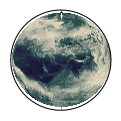

Finished with file for: january
3 NaN values still remaining in data for july !
Finished with file for: july
3600 NaN values still remaining in data for june !
Finished with file for: june
Finished with file for: march
Finished with file for: may
Finished with file for: november
Finished with file for: october
Finished with file for: september


In [8]:
# PLOT CLOUD COVER (INTERPOLATE MISSING VALUES)

filenames = glob.glob("./data/cloud_cover_NASA/*.txt")
vmin, vmax = 0, 0
colorbar = False

for readname in filenames: 
    df = pd.read_csv(readname, header=None, index_col=None)
    df = df.replace(to_replace=99999., value=np.nan)
    vmin = min(vmin, df.min().min())
    vmax = max(vmax, df.max().max())
print("Vmin across all CSVs:", vmin, "Vmax across all CSVs:", vmax)
    
for readname in filenames: 
    month = readname.split("/")[-1].split("\\")[-1].split("_")[0]
    savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/cloud_cover_NASA/'+month+'_earth.png'

    df = pd.read_csv(readname, header=None)
    df = df.replace(to_replace=99999., value=np.nan)
    temp = df[len(df.columns)-1]
    df = pd.concat([temp, df], axis=1) # loop last values to front to fill in nans
    df = df.replace(method='ffill', limit=75) # forward fill nans with interpolated values
    df = df.replace(method='bfill', limit=75) # back fill nans with interpolated values
    df = df.drop(labels=0, axis=1)
    if df.isna().any().sum() > 0: 
        print(df.isna().any().sum(), "NaN values still remaining in data for", month, "!")

    fig = plt.figure(figsize=figsize_small)
    ax = plt.axes(projection=ccrs.Orthographic(*ortho_small))
    ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
              interpolation='spline36', regrid_shape=4000, cmap=cloud_cmap, vmin=vmin, vmax=vmax)
    
    if colorbar == True: # Check colorbar for direction
        sm = plt.cm.ScalarMappable(cmap=cloud_cmap,norm=plt.Normalize(vmin,vmax))
        sm._A = []
        plt.colorbar(sm,ax=ax)
    
    if month == 'january':
        show = True
    else: 
        show = False
    set_save_image(fig, savename, show=show)
    print("Finished with file for:", month)

Vmin across all CSVs: 0 Vmax across all CSVs: 534.84
Finished with file for: april
Finished with file for: august
Finished with file for: december
Finished with file for: february


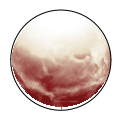

Finished with file for: january
Finished with file for: july
Finished with file for: june
Finished with file for: march
Finished with file for: may
Finished with file for: november
Finished with file for: october
Finished with file for: september


In [9]:
# PLOT SOLAR INSOLATION (NO MISSING VALUES IN ORIGINAL DATA)

filenames = glob.glob("./data/solar_insolation_NASA/*.txt")
vmin, vmax = 0, 0
colorbar = False

for readname in filenames: 
    df = pd.read_csv(readname, header=None, index_col=None)
    vmin = min(vmin, df.min().min())
    vmax = max(vmax, df.max().max())
print("Vmin across all CSVs:", vmin, "Vmax across all CSVs:", vmax)
vmax = 550 # Set manually since vmax is not normalized to 1
    
for readname in filenames: 
    month = readname.split("/")[-1].split("\\")[-1].split("_")[0]
    savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/solar_insolation_NASA/'+month+'_earth.png'

    df = pd.read_csv(readname, header=None)
    fig = plt.figure(figsize=figsize_small)
    ax = plt.axes(projection=ccrs.Orthographic(*ortho_small))
    ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
              interpolation='spline36', regrid_shape=4000, cmap=solar_cmap, vmin=vmin, vmax=vmax)
    
    if colorbar == True: # Check colorbar for direction
        sm = plt.cm.ScalarMappable(cmap=solar_cmap,norm=plt.Normalize(vmin,vmax))
        sm._A = []
        plt.colorbar(sm,ax=ax)

    if month == 'january':
        show = True
    else: 
        show = False
    set_save_image(fig, savename, show=show)
    print("Finished with file for:", month)

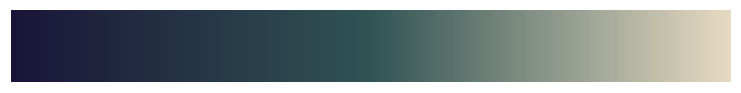

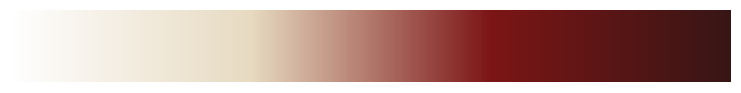

In [5]:
# Plot colorbars for solar insolation and cloud cover
for cmap, item in zip([cloud_cmap, solar_cmap], ['cloud', 'solar']):
    savename = "./figures/"+item+"_key.png"
    fig = plt.figure(figsize=(12, 1))
    colors = cmap(np.arange(cmap.N))
    ax = fig.add_subplot(111)
    ax.imshow([colors], extent=[0, 10, 0, 1])
    set_save_image(fig, savename, show=True)

Finished with files for: N april
Finished with files for: S april
Finished with files for: N august
Finished with files for: S august
Finished with files for: N december
Finished with files for: S december
Finished with files for: N february
Finished with files for: S february


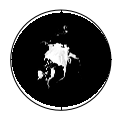

Finished with files for: N january


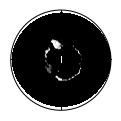

Finished with files for: S january
Finished with files for: N july
Finished with files for: S july
Finished with files for: N june
Finished with files for: S june
Finished with files for: N march
Finished with files for: S march
Finished with files for: N may
Finished with files for: S may
Finished with files for: N november
Finished with files for: S november
Finished with files for: N october
Finished with files for: S october
Finished with files for: N september
Finished with files for: S september


In [10]:
# PLOT ICE SHEETS FOR SMALL NORTH AND SOUTH GLOBES

filenames = glob.glob("./data/ice_sheets_NASA/*.txt")
orthos = ortho_n, ortho_s
labels = "N", "S"

for readname in filenames: 
    for orth, label in zip(orthos, labels):
        month = readname.split("/")[-1].split("\\")[-1].split("_")[0]
        savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/ice_sheets_NASA_'+label+'/'+label+"_"+month+'_earth.png'

        fig = plt.figure(figsize=figsize_small)
        ax = plt.axes(projection=ccrs.Orthographic(*orth))
        df = pd.read_csv(readname, header=None)
        ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
                  interpolation='spline36', regrid_shape=4000, cmap="gray", vmin=0, vmax=100)
        if month == 'january':
            show = True
        else: 
            show = False
        set_save_image(fig, savename, show=show)
        print("Finished with files for:", label, month)

Finished with file for: april
Finished with file for: august
Finished with file for: december
Finished with file for: february


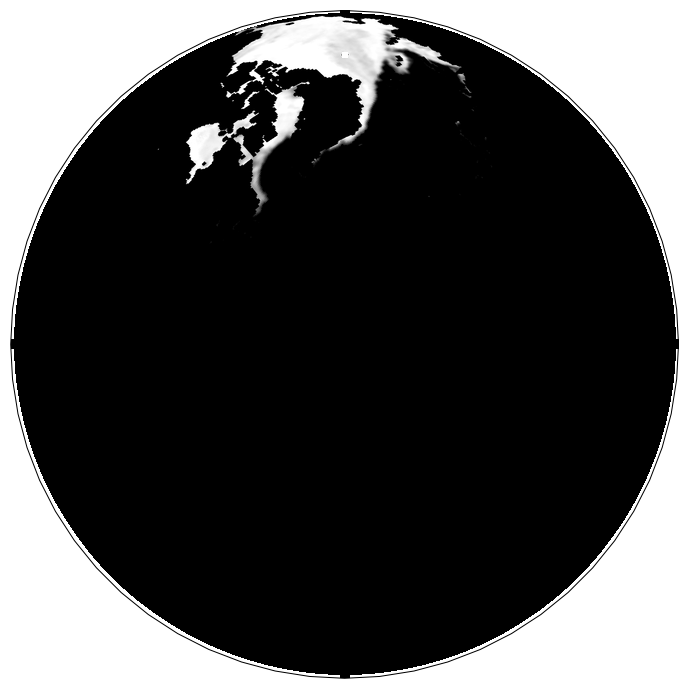

Finished with file for: january
Finished with file for: july
Finished with file for: june
Finished with file for: march
Finished with file for: may
Finished with file for: november
Finished with file for: october
Finished with file for: september


In [11]:
# PLOT ICE SHEETS FOR LARGE EARTH IMAGE AT CENTER

filenames = glob.glob("./data/ice_sheets_NASA/*.txt")

for readname in filenames: 
    month = readname.split("/")[-1].split("\\")[-1].split("_")[0]
    savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/ice_sheets_NASA/'+month+'_earth.png'

    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.Orthographic(*ortho))
    df = pd.read_csv(readname, header=None)
    ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
              interpolation='spline36', regrid_shape=4000, cmap="gray", vmin=0, vmax=100)
    if month == 'january':
        show = True
    else: 
        show = False
    set_save_image(fig, savename, show=show)
    print("Finished with file for:", month)

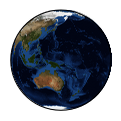

In [12]:
# PLOT RASTER IMAGE for OPPOSITE SIDE, APRIL (not used in animation)

readname = "A:/ATLAS_OF_SPACE/raw_data/earth/blue_marble_NASA/april_world.topo.bathy.200404.3x21600x10800.png"
savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/blue_marble_NASA/april_otherside_earth.png'

fig = plt.figure(figsize=figsize_small)
ax = plt.axes(projection=ccrs.Orthographic(*ortho_opp))
img = plt.imread(readname)
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
          interpolation='spline36', regrid_shape=4000)

set_save_image(fig, savename, show=True)

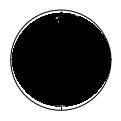

In [13]:
# PLOT ICE SHEET for OPPOSITE SIDE, APRIL (not used in animation)

readname = './data/ice_sheets_NASA/april_15_2017.txt'
savename = 'A:/ATLAS_OF_SPACE/image_outputs/earth/april_ice_earth.png'

fig = plt.figure(figsize=figsize_small)
ax = plt.axes(projection=ccrs.Orthographic(*ortho_opp))
df = pd.read_csv(readname, header=None)
ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
          interpolation='spline36', regrid_shape=4000, cmap="gray", vmin=0, vmax=100)
set_save_image(fig, savename, show=True)